In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('../input/final.csv')

In [3]:
df

,ASVAB,FamilyIncome,HighSchoolGrade
0,45.070,50000,7.0
1,58.483,81000,5.0
2,27.978,150250,6.0
3,22.001,55000,3.0
4,3.585,14766,5.0
...,...,...,...
5015,18.599,38000,5.0
5016,12.716,30441,3.0
5017,27.785,33500,5.0
5018,96.478,40400,7.0


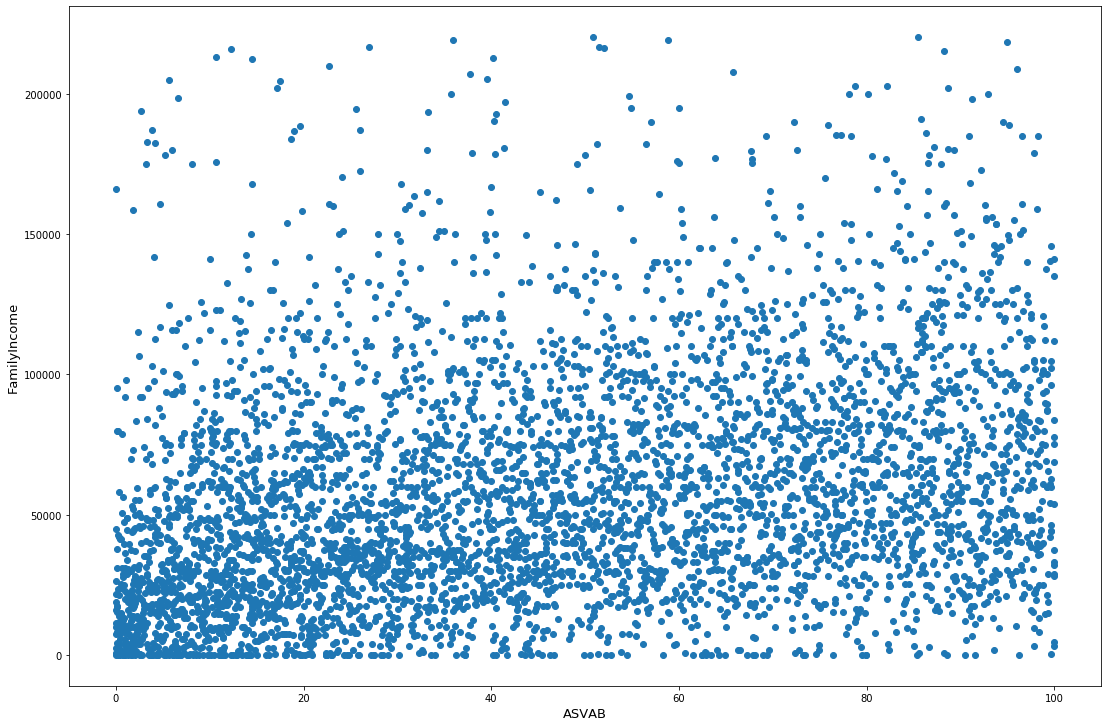

In [4]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('ASVAB', fontsize=13)
plt.show()
plt.close()

In [5]:
X=df.ASVAB.to_numpy().reshape(-1, 1)
y=df.FamilyIncome
print(X,y)

[[45.07 ]
 [58.483]
 [27.978]
 ...
 [27.785]
 [96.478]
 [71.549]] 0        50000
1        81000
2       150250
3        55000
4        14766
         ...  
5015     38000
5016     30441
5017     33500
5018     40400
5019     19643
Name: FamilyIncome, Length: 5020, dtype: int64


In [6]:
# checking the p values
import statsmodels.api as sm
X = sm.add_constant(X)

mod = sm.OLS( y,X)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           FamilyIncome   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     508.1
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          3.00e-107
Time:                        11:36:55   Log-Likelihood:                -60194.
No. Observations:                5020   AIC:                         1.204e+05
Df Residuals:                    5018   BIC:                         1.204e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.813e+04   1019.913     37.387      0.0

In [7]:
regressor = LinearRegression()  
regressor.fit(X, y)

print(regressor.intercept_)
print(regressor.score(X, y))

38132.00630700037
0.09194081260192477


In [8]:
print(regressor.coef_)


[  0.         423.21269734]


In [9]:
df.corr()

,ASVAB,FamilyIncome,HighSchoolGrade
ASVAB,1.000000,0.303217,0.473841
FamilyIncome,0.303217,1.000000,0.226380
HighSchoolGrade,0.473841,0.226380,1.000000


In [10]:
response=regressor.predict(X)
r2 = regressor.score(X, y)


In [11]:
X=df.ASVAB.to_numpy().reshape(-1, 1)
y=df.FamilyIncome
print(X,y)

[[45.07 ]
 [58.483]
 [27.978]
 ...
 [27.785]
 [96.478]
 [71.549]] 0        50000
1        81000
2       150250
3        55000
4        14766
         ...  
5015     38000
5016     30441
5017     33500
5018     40400
5019     19643
Name: FamilyIncome, Length: 5020, dtype: int64


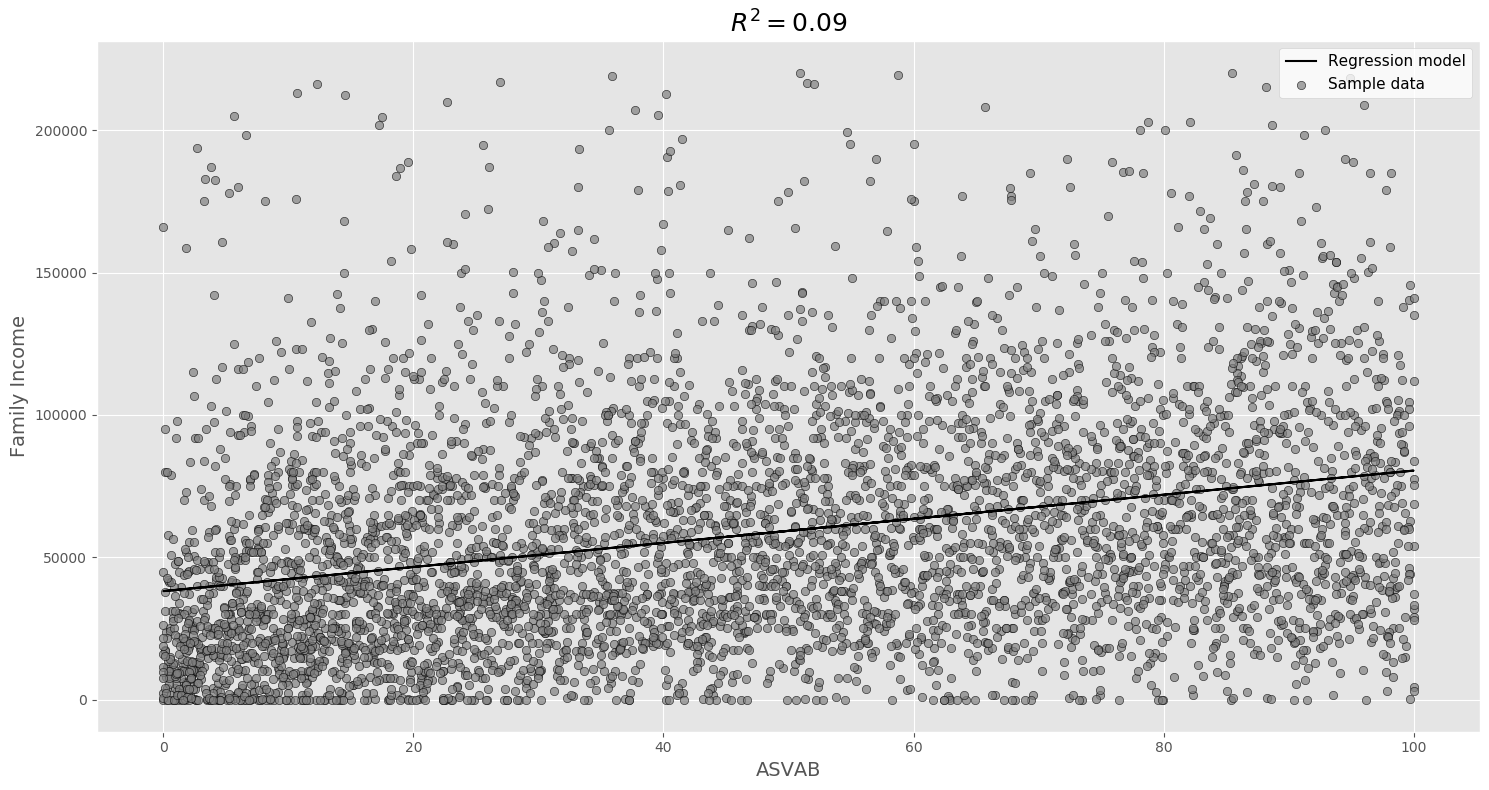

In [12]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(X, response, color='k', label='Regression model')

ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Family Income', fontsize=14)
ax.set_xlabel('ASVAB', fontsize=14)
ax.legend(facecolor='white', fontsize=11)

ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
fig.tight_layout()

plt.show()
plt.close()

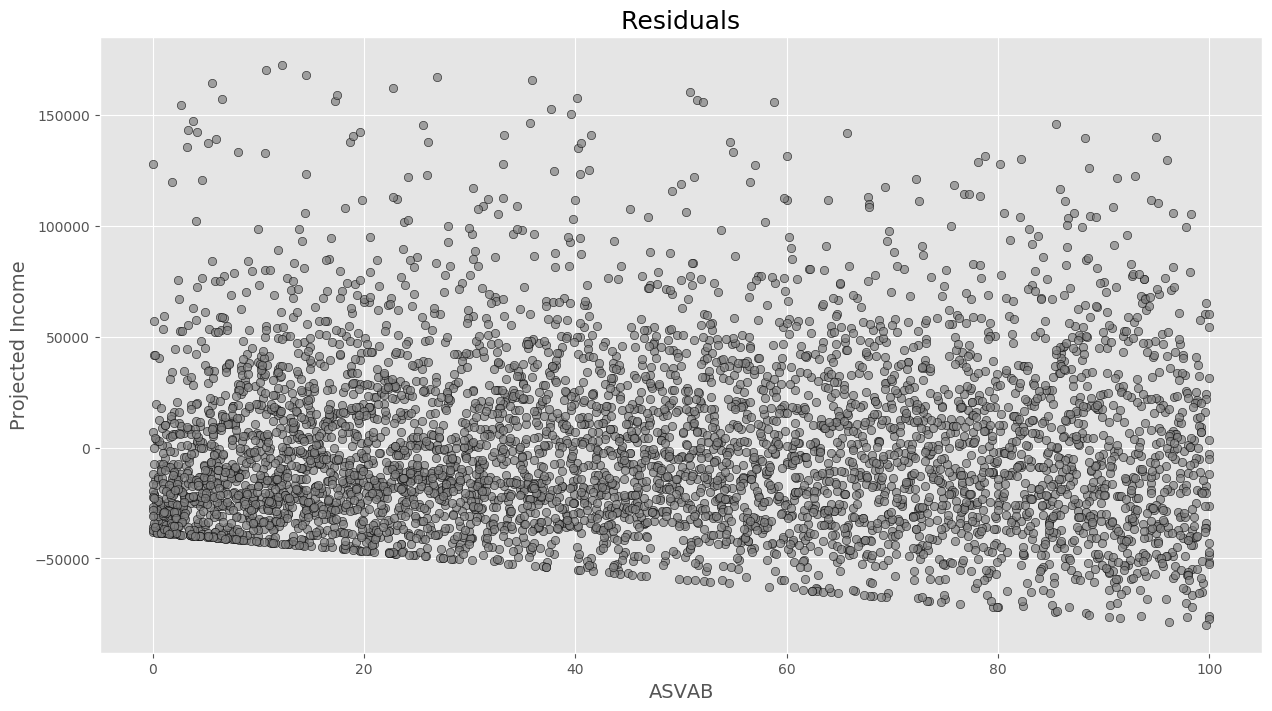

In [13]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15, 8))


ax.scatter(X, (y-response), edgecolor='k', facecolor='grey', alpha=0.7, label='Residuals')
ax.set_ylabel('Projected Income', fontsize=14)
ax.set_xlabel('ASVAB', fontsize=14)
ax.set_title('Residuals', fontsize=18)

plt.show()
plt.close()

In [14]:
residuals=(y-response)
residuals.describe()

count    5.020000e+03
mean     2.059299e-11
std      3.902311e+04
min     -7.991616e+04
25%     -2.801060e+04
50%     -7.698383e+03
75%      2.084222e+04
max      1.728494e+05
Name: FamilyIncome, dtype: float64

In [15]:
y

0        50000
1        81000
2       150250
3        55000
4        14766
         ...  
5015     38000
5016     30441
5017     33500
5018     40400
5019     19643
Name: FamilyIncome, Length: 5020, dtype: int64

In [16]:
response

array([57206.20257597, 62882.75448535, 49972.65115309, ...,
       49890.9711025 , 78962.72092066, 68412.45158875])

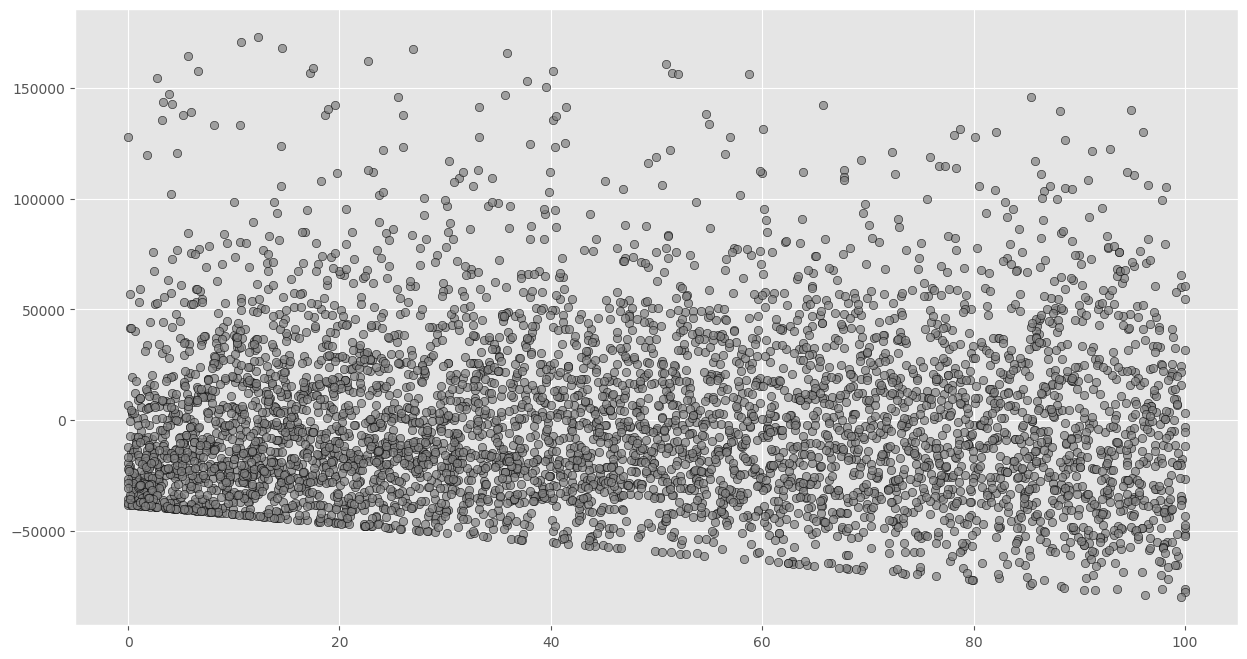

In [17]:

fig, ax = plt.subplots(figsize=(15, 8))


ax.scatter(X, residuals, edgecolor='k', facecolor='grey', alpha=0.7, label='Residuals')